# MOwNiT 
## Laboratorium 4

### Tablice wielowymiarowe i mnożenie macierzy w Julii

In [1]:
#tablice wielowymiarowe w Julii
Asmall=[[1.0 0.0]; [0.0 1.0]]
Bsmall=Asmall
#size(B,1)

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [2]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

naive_multiplication (generic function with 1 method)

In [3]:
#kompilacja
naive_multiplication(Asmall,Bsmall)

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [4]:
#kompilacja funkcji BLASowej do mnożenia macierzy
#https://docs.julialang.org/en/stable/stdlib/linalg/#BLAS-Functions-1
Asmall*Bsmall

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [5]:
A=rand(1000,1000);
B=rand(1000,1000);

In [6]:
# Należy pamiętać o "column-major" dostępie do tablic - 
# pierwszy indeks zmienia się szybciej
# tak jak Matlab, R, Fortran 
# inaczej niz C, Python
A1 = [[1 2]; [3 4]]
vec(A1)

4-element Vector{Int64}:
 1
 3
 2
 4

In [7]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
#można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [8]:
better_multiplication(Asmall, Bsmall)

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [9]:
@elapsed naive_multiplication(A,B)

2.814329128

In [10]:
@elapsed better_multiplication(A,B)

1.408407151

In [11]:
@elapsed A*B

0.029384127

### Wielomiany i aproksymacja średniokwadratowa

In [12]:
# aproksymacja sredniokwadratowa wielomianem - tutaj przyklad dla wielomianu 3 stopnia
# pakiet Polynomials jest mozliwy do instalacji pod Juliabox
# https://github.com/JuliaMath/Polynomials.jl
#using Pkg
#Pkg.add("Polynomials")
using Polynomials
# tworzę punkty do aproksymacji (tutaj jako przykład wyliczone wartości funkcji e^x)
xs = 0:10; ys = map(x->exp(x), xs)

#dopasowuje wielomian trzeciego stopnia do danych
fit_poly_3=fit(xs, ys,3)

Polynomial(-1086.8658708490193 + 2905.5721994684577*x - 1082.745723874463*x^2 + 100.44658880845408*x^3)

In [13]:
# obliczanie wartosci wielomianu 
fit_poly_3(1)

836.4071935534294

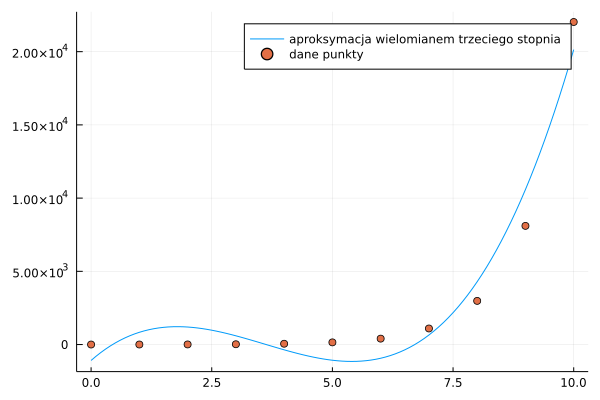

In [14]:
using Plots
plot(fit_poly_3,  extrema(xs)..., label="aproksymacja wielomianem trzeciego stopnia")
# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs,ys,label ="dane punkty")


### Wielomiany Czebyszewa w pakiecie Polynomials

In [15]:
# podajemy tablicę współczynników, gdzie wielomiany Czebyszewa są wielomianami bazowymi np dla T2(x)
t2=ChebyshevT([0,0,1])

ChebyshevT(1⋅T_2(x))

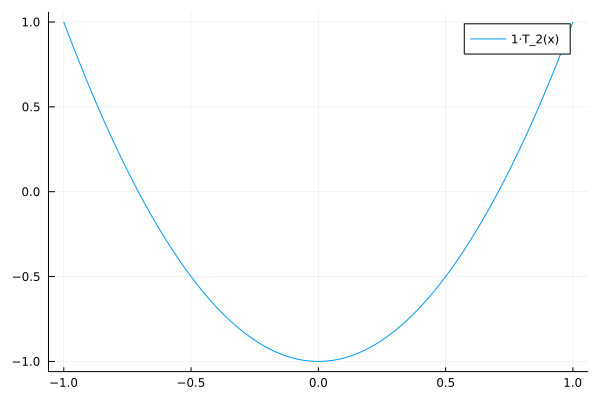

In [16]:
plot(t2)

In [17]:
#zera wielomianu Czebyszewa T2
Polynomials.roots(t2)

2-element Vector{Float64}:
 -0.7071067811865475
  0.7071067811865476

In [18]:
# konwersja 
convert(Polynomial, t2)

Polynomial(-1.0 + 2.0*x^2)

In [19]:
#można tworzyć kombinacje liniowe w bazie wielomianów Czebyszewa
kombinacja_T=ChebyshevT([3,2,1])

ChebyshevT(3⋅T_0(x) + 2⋅T_1(x) + 1⋅T_2(x))

Skąd się wzieło polynomials logo :-)
https://juliamath.github.io/Polynomials.jl/stable/reference/#Example:-The-Polynomials.jl-logo-1

## Aproksymacja jednostajna Taylora i Pade

In [20]:
#pakiet do rozwijania w szereg Taylora
# using Pkg; Pkg.add("TaylorSeries")
using TaylorSeries

In [21]:
# Definiujemy, ile pierwszych wyrazów szeregu Taylora nas interesuje
t = Taylor1(Float64, 5)

 1.0 t + 𝒪(t⁶)

In [22]:
# Przykładowa funkcja, którą będziemy aproksymować jednostajnie
myfun(x)=exp(x)

myfun (generic function with 1 method)

In [23]:
#Rozwinięcie Taylora 
p=myfun(t)

 1.0 + 1.0 t + 0.5 t² + 0.16666666666666666 t³ + 0.041666666666666664 t⁴ + 0.008333333333333333 t⁵ + 𝒪(t⁶)

In [24]:
# Julia hint - jak zapytać o pola typu danych
fieldnames(typeof(p))

(:coeffs, :order)

In [25]:
# mogę wyciągnąć ze struktury typu  odpowiednie pole
p.coeffs

6-element Vector{Float64}:
 1.0
 1.0
 0.5
 0.16666666666666666
 0.041666666666666664
 0.008333333333333333

In [26]:
#Z przybliżenia Taylora tworzę wielomian zrozumiały dla pakietu Polynomials (typ Polynomial)
using Polynomials
p=Polynomial(p.coeffs)

Polynomial(1.0 + 1.0*x + 0.5*x^2 + 0.16666666666666666*x^3 + 0.041666666666666664*x^4 + 0.008333333333333333*x^5)

In [27]:
# mogę zamienić przybliżenie Taylora na aproksymację Pade (np. dla n=2, m=2)
pade=Polynomials.PolyCompat.PadeApproximation.Pade(p, 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64, Float64}(Polynomial(1.0 + 0.5000000000000001*x + 0.08333333333333333*x^2), Polynomial(1.0 - 0.5*x + 0.08333333333333333*x^2), :x)

### Zadania
 
1. Uruchomić 
   - naive_multiplication(A,B), 
   - better_multiplication(A,B) 
   - mnożenie BLAS w Julii (A*B) 

    dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie. (1pkt)
 
 
2. Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną za pomocą zamiany pętli metodę mnożenia macierzy(wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1.(osobno niż p.1). (Dla chętnych) sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. (1 pkt)


3. Użyć funkcji polyfit  z pakietu  Polynomials   do znalezienia odpowiednich wielomianow, ktore najlepiej pasują do zależności czasowych kazdego z algorytmow. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianow do wczesniejszych  wykresów. (1 pkt)

4. Pokazać zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Wymagany wykres. (1 pkt)

5. Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ (1 pkt)


## Results

### 1. Comparison between matrix multiplication methods in Julia

In [28]:
function naive_test(A,B)
    @elapsed naive_multiplication(A,B)
end

naive_test (generic function with 1 method)

In [29]:
function improved_test(A,B)
    @elapsed better_multiplication(A,B)
end

improved_test (generic function with 1 method)

In [30]:
function best_test(A,B)
    @elapsed A*B
end

best_test (generic function with 1 method)

In [31]:
naive_test(Asmall,Bsmall)

2.3e-6

In [32]:
improved_test(Asmall,Bsmall)

1.97e-6

In [33]:
best_test(Asmall,Bsmall)

1.97e-6

In [34]:
using DataFrames
df1 = DataFrame(length = Int64[], 
    t = String[],
    time = Float64[])

,length,t,time
,Int64,String,Float64


In [35]:
 #start and interval
interval = 100
tr1 = interval:interval:10*interval

100:100:1000

In [36]:
for i=tr1
    for j=1:10
        A = rand(i,i);
        B = rand(i,i);
        push!(df1, [i "n" naive_test(A,B)])
        push!(df1, [i "i" improved_test(A,B)])
        push!(df1, [i "b" best_test(A,B)])
    end
end

In [37]:
df1

,length,t,time
,Int64,String,Float64
1,100,n,0.00258241
2,100,i,0.00100351
3,100,b,0.00014171
4,100,n,0.00255846
5,100,i,0.000999279
6,100,b,8.895e-5
7,100,n,0.00257495
8,100,i,0.000999449
9,100,b,8.955e-5


In [38]:
df1grouped = groupby(df1, [:length, :t])

,length,t,time
,Int64,String,Float64
1,100,n,0.00258241
2,100,n,0.00255846
3,100,n,0.00257495
4,100,n,0.00258312
5,100,n,0.00258291
6,100,n,0.00264192
7,100,n,0.00269839
8,100,n,0.00268929
9,100,n,0.00273526


In [39]:
using Statistics

In [40]:
df1_to_plot = combine(df1grouped, "time" => mean, "time" => std)

,length,t,time_mean,time_std
,Int64,String,Float64,Float64
1,100,n,0.00263667,6.82283e-5
2,100,i,0.00107968,0.000157307
3,100,b,8.8243e-5,2.47573e-5
4,200,n,0.0228679,0.000434419
5,200,i,0.0113966,0.00407813
6,200,b,0.000442974,1.39455e-5
7,300,n,0.0775801,0.00035954
8,300,i,0.0377257,0.0119083
9,300,b,0.00113486,0.000273496


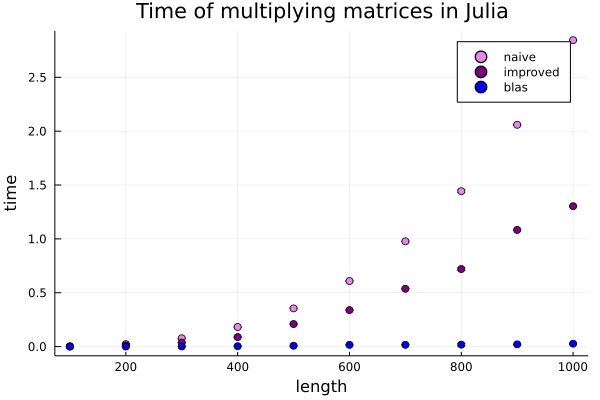

In [41]:
# using Plots
scatter([ df1_to_plot[df1_to_plot[:,2] .== "n", :].length df1_to_plot[df1_to_plot[:,2] .== "i", :].length df1_to_plot[df1_to_plot[:,2] .== "b", :].length],
    [ df1_to_plot[df1_to_plot[:,2] .== "n", :].time_mean  df1_to_plot[df1_to_plot[:,2] .== "i", :].time_mean df1_to_plot[df1_to_plot[:,2] .== "b", :].time_mean ],
    colour = [:violet :purple :blue],
    yerr = df1_to_plot.time_std,
    label = [ "naive" "improved" "blas"],
    title = "Time of multiplying matrices in Julia",
    xlab = "length",
    ylab = "time"
)

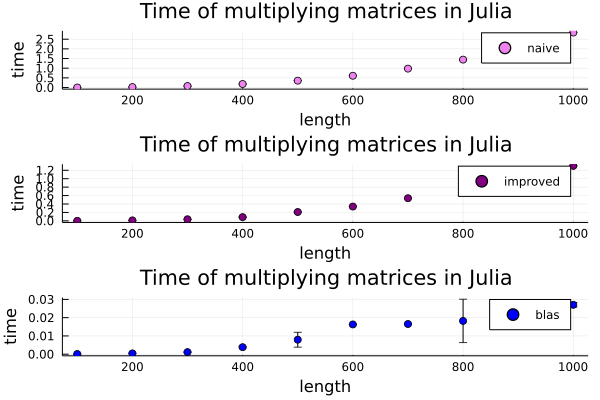

In [42]:
# using Plots
scatter([ df1_to_plot[df1_to_plot[:,2] .== "n", :].length df1_to_plot[df1_to_plot[:,2] .== "i", :].length df1_to_plot[df1_to_plot[:,2] .== "b", :].length],
    [ df1_to_plot[df1_to_plot[:,2] .== "n", :].time_mean  df1_to_plot[df1_to_plot[:,2] .== "i", :].time_mean df1_to_plot[df1_to_plot[:,2] .== "b", :].time_mean ],
    colour = [:violet :purple :blue],
    yerr = df1_to_plot.time_std,
    label = [ "naive" "improved" "blas"],
    title = "Time of multiplying matrices in Julia",
    xlab = "length",
    ylab = "time",
    layout = (3,1)
)

### 2. Comparison between matrix multiplication methods in C

My code in C:

```c
//
// Created by wojkly on 4/4/21.
//

#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <gsl/gsl_blas.h>

#include <fcntl.h>
#include <unistd.h>
#include <sys/types.h>
#include <sys/stat.h>

#include <time.h>
#include <sys/times.h>
#include <sys/resource.h>
clock_t start, end;
struct tms st_cpu, en_cpu;

void timer_start(){ start = times(&st_cpu);}
void timer_end(){ end = times(&en_cpu);}

//void write_timer_to_file(char* operation_name, FILE* report_file){
float write_timer(){
    int clock_tics = sysconf(_SC_CLK_TCK);

    double real_time;
    real_time = (double ) (end - start)/ clock_tics;
//    fprintf(report_file, "%s:\n%s %f\n%s %f\n%s %f\n",operation_name,"Real time: ",real_time,"User time: ",user_time,"System time: ",system_time);
    printf(" %f ",real_time);
    return real_time;
}

void naive_multiply(double **A, double **B, double **C, int n){
    for (int i = 0; i < n; ++i)
        for (int j = 0; j < n; ++j)
            for (int k = 0; k < n; ++k)
                C[i][j] += A[i][k]*B[k][j];
}
void free_matrix(double **a, int n);

void improved_multiply(double **A, double **B, double **C, int n){
    for (int i = 0; i < n; ++i)
        for (int k = 0; k < n; ++k)
            for (int j = 0; j < n; ++j)
                C[i][j] += A[i][k]*B[k][j];
}

double **create_matrix(int n){
    double **A = calloc(n, sizeof(double *));
    for (int i = 0; i < n; ++i) {
        A[i] = calloc(n, sizeof(double ));
        for (int j = 0; j < n; ++j) {
            A[i][j] = ((double)rand()/(double)(RAND_MAX)) * 5.0;
        }
    }
    return A;
}
double **create_matrix_zeros(int n){
    double **A = calloc(n, sizeof(double *));
    for (int i = 0; i < n; ++i) {
        A[i] = calloc(n, sizeof(double ));
        for (int j = 0; j < n; ++j) {
            A[i][j] = 0.0;
        }
    }
    return A;
}
void free_matrix(double **A, int n){
    for (int i = 0; i < n; ++i) {
        free(A[i]);
    }
    free(A);
}

void test_matrices(){
    char *filename1 = "data_c.csv";
    FILE * f1;
    f1 = fopen(filename1, "w");

//    int first = 25;
//    int interval = 25;
//    int last = 251;
    int first = 100;
    int interval = 100;
    int last = 1001;

    fprintf(f1,"length,t,time");
    float time;
    for (int i = first; i < last; i += interval) {
        for (int j = 0; j < 10; ++j) {
            printf("\n %d ",i);
            double **A, **B, **C;
            A = create_matrix(i);
            B = create_matrix(i);
            C = create_matrix_zeros(i);

            //test naive
            timer_start();
            naive_multiply(A,B,C,i);
            timer_end();
            time = write_timer();
            fprintf(f1,"\n%d,%s,%f",i,"n",time);

            //test better
            free_matrix(C,i);
            C = create_matrix_zeros(i);
            timer_start();
            improved_multiply(A,B,C,i);
            timer_end();
            time = write_timer();
            fprintf(f1,"\n%d,%s,%f",i,"i",time);

            free_matrix(A,i);
            free_matrix(B,i);
            free_matrix(C,i);

            //test lib function
            double *a = calloc(i*i, sizeof(double ));
            double *b = calloc(i*i, sizeof(double ));
            double *c = calloc(i*i, sizeof(double ));
            for (int k = 0; k < i*i; ++k) {
                a[i] = ((double)rand()/(double)(RAND_MAX)) * 5.0;
                b[i] = ((double)rand()/(double)(RAND_MAX)) * 5.0;
                c[i] = 0.0;
            }
            gsl_matrix_view A2 = gsl_matrix_view_array(a,i,i);
            gsl_matrix_view B2 = gsl_matrix_view_array(b,i,i);
            gsl_matrix_view C2 = gsl_matrix_view_array(c,i,i);
            timer_start();
            gsl_blas_dgemm (CblasNoTrans, CblasNoTrans,
                            1.0, &A2.matrix, &B2.matrix,
                            0.0, &C2.matrix);
            timer_end();
            time = write_timer();
            fprintf(f1,"\n%d,%s,%f",i,"b",time);

            free(a);
            free(b);
            free(c);
        }
    }
    fclose(f1);
}


int main (void)
{
    srand((unsigned int)time(NULL));

    test_matrices();

    return 0;
}
```

In [43]:
using CSV

In [44]:
df2 = CSV.read("data_c.csv", delim=",",DataFrame)

,length,t,time
,Int64,String,Float64
1,100,n,0.0
2,100,i,0.0
3,100,b,0.0
4,100,n,0.01
5,100,i,0.01
6,100,b,0.0
7,100,n,0.0
8,100,i,0.0
9,100,b,0.0


In [45]:
df2grouped = groupby(df2, [:length, :t])

,length,t,time
,Int64,String,Float64
1,100,n,0.0
2,100,n,0.01
3,100,n,0.0
4,100,n,0.01
5,100,n,0.01
6,100,n,0.01
7,100,n,0.01
8,100,n,0.0
9,100,n,0.01


In [46]:
df2_to_plot = combine(df2grouped, "time" => mean, "time" => std)

,length,t,time_mean,time_std
,Int64,String,Float64,Float64
1,100,n,0.006,0.00516398
2,100,i,0.003,0.00483046
3,100,b,0.0,0.0
4,200,n,0.033,0.00483046
5,200,i,0.032,0.00632456
6,200,b,0.0,0.0
7,300,n,0.111,0.00567646
8,300,i,0.103,0.00483046
9,300,b,0.0,0.0


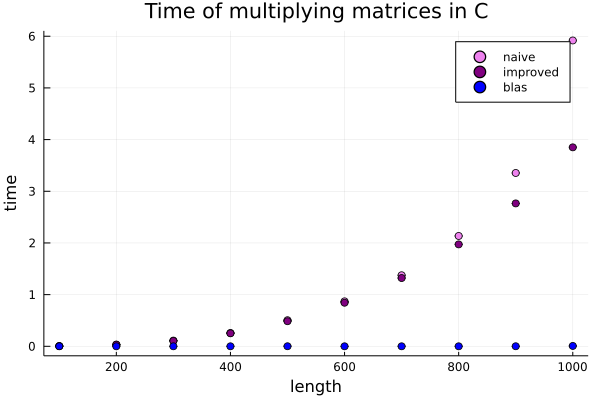

In [47]:
# using Plots
scatter([ df2_to_plot[df2_to_plot[:,2] .== "n", :].length df2_to_plot[df2_to_plot[:,2] .== "i", :].length df2_to_plot[df2_to_plot[:,2] .== "b", :].length],
    [ df2_to_plot[df2_to_plot[:,2] .== "n", :].time_mean  df2_to_plot[df2_to_plot[:,2] .== "i", :].time_mean df2_to_plot[df2_to_plot[:,2] .== "b", :].time_mean ],
    colour = [:violet :purple :blue],
    yerr = df2_to_plot.time_std,
    label = [ "naive" "improved" "blas"],
    title = "Time of multiplying matrices in C",
    xlab = "length",
    ylab = "time"
)

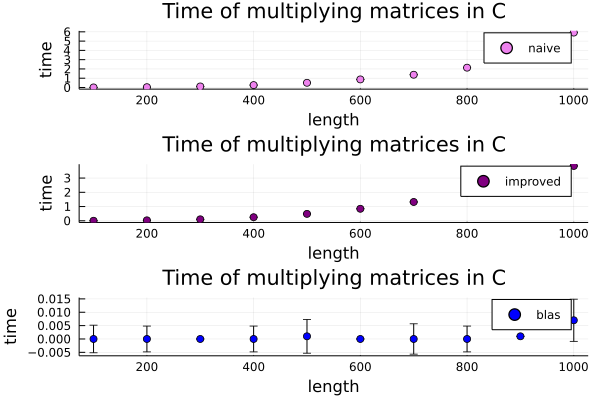

In [48]:
# using Plots
scatter([ df2_to_plot[df2_to_plot[:,2] .== "n", :].length df2_to_plot[df2_to_plot[:,2] .== "i", :].length df2_to_plot[df2_to_plot[:,2] .== "b", :].length],
    [ df2_to_plot[df2_to_plot[:,2] .== "n", :].time_mean  df2_to_plot[df2_to_plot[:,2] .== "i", :].time_mean df2_to_plot[df2_to_plot[:,2] .== "b", :].time_mean ],
    colour = [:violet :purple :blue],
    yerr = df2_to_plot.time_std,
    label = [ "naive" "improved" "blas"],
    title = "Time of multiplying matrices in C",
    xlab = "length",
    ylab = "time",
    layout = (3,1)
)

### 3 Aproximating results using poly fit function

In [49]:
names(df1)

3-element Vector{String}:
 "length"
 "t"
 "time"

#### a) Julia methods

In [50]:
x_julia = df1_to_plot[df1_to_plot[:,2] .== "n", 1]
y_julia_n = df1_to_plot[df1_to_plot[:,2] .== "n", 3]
y_julia_i = df1_to_plot[df1_to_plot[:,2] .== "i", 3]
y_julia_b = df1_to_plot[df1_to_plot[:,2] .== "b", 3]
println()

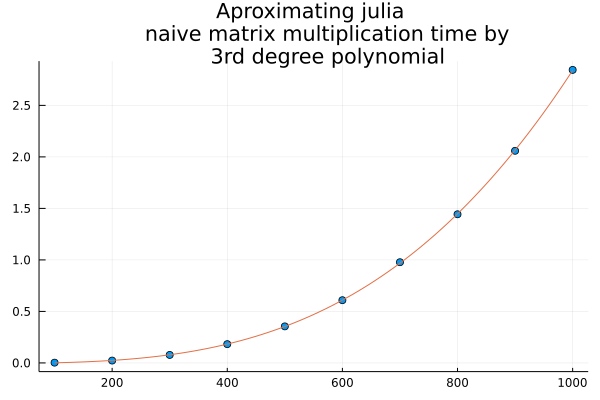

In [51]:
# using Plots
fit_poly_julia_n = fit(x_julia, y_julia_n, 3)
scatter(x_julia,y_julia_n, label ="")
plot!(fit_poly_julia_n,  
    extrema(x_julia)..., 
    label = "",
    title = "Aproximating julia 
    naive matrix multiplication time by
    3rd degree polynomial"
)

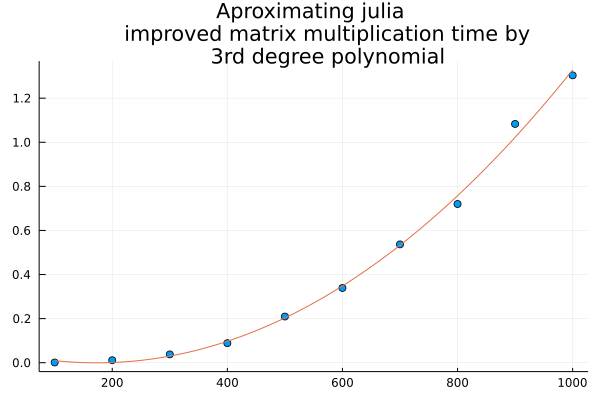

In [52]:
# using Plots
fit_poly_julia_i = fit(x_julia, y_julia_i, 3)
scatter(x_julia,y_julia_i, label ="")
plot!(fit_poly_julia_i,  
    extrema(x_julia)..., 
    label = "",
    title = "Aproximating julia 
    improved matrix multiplication time by
    3rd degree polynomial"
)

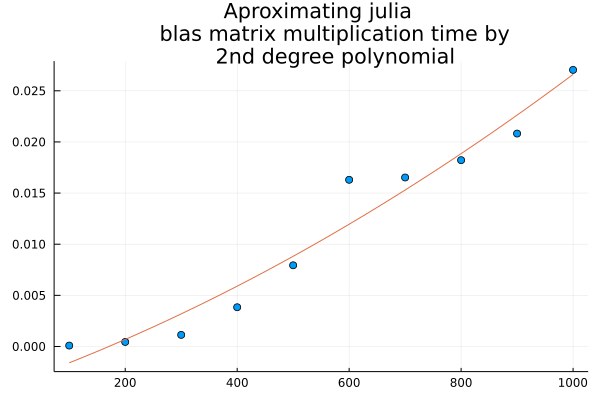

In [53]:
# using Plots
fit_poly_julia_b = fit(x_julia, y_julia_b, 2)
scatter(x_julia,y_julia_b, label ="")
plot!(fit_poly_julia_b,  
    extrema(x_julia)..., 
    label = "",
    title = "Aproximating julia 
    blas matrix multiplication time by
    2nd degree polynomial"
)

Cumulative plot

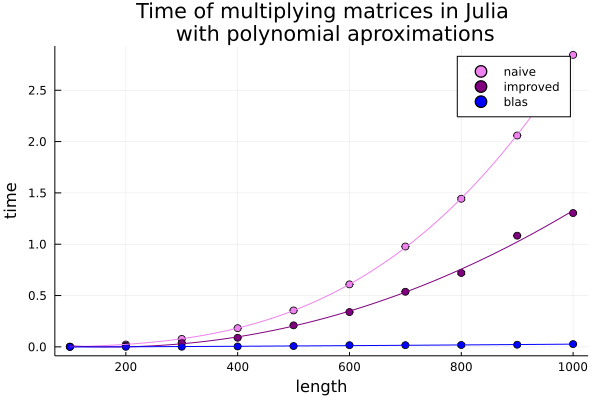

In [90]:
# using Plots
scatter([ df1_to_plot[df1_to_plot[:,2] .== "n", :].length df1_to_plot[df1_to_plot[:,2] .== "i", :].length df1_to_plot[df1_to_plot[:,2] .== "b", :].length],
    [ df1_to_plot[df1_to_plot[:,2] .== "n", :].time_mean  df1_to_plot[df1_to_plot[:,2] .== "i", :].time_mean df1_to_plot[df1_to_plot[:,2] .== "b", :].time_mean ],
    colour = [:violet :purple :blue],
    yerr = df1_to_plot.time_std,
    label = [ "naive" "improved" "blas"],
    title = "Time of multiplying matrices in Julia
    with polynomial aproximations",
    xlab = "length",
    ylab = "time"
)
plot!(fit_poly_julia_n,  
    extrema(x_julia)..., 
    label = "",
    color = "violet"
)
plot!(fit_poly_julia_i,  
    extrema(x_julia)..., 
    label = "",
    color = "purple"
)
plot!(fit_poly_julia_b,  
    extrema(x_julia)..., 
    label = "",
    color = "blue"
)

#### b) C methods

In [54]:
names(df2)

3-element Vector{String}:
 "length"
 "t"
 "time"

In [55]:
x_c = df2_to_plot[df2_to_plot[:,2] .== "n", 1]
y_c_n = df2_to_plot[df2_to_plot[:,2] .== "n", 3]
y_c_i = df2_to_plot[df2_to_plot[:,2] .== "i", 3]
y_c_b = df2_to_plot[df2_to_plot[:,2] .== "b", 3]
println()

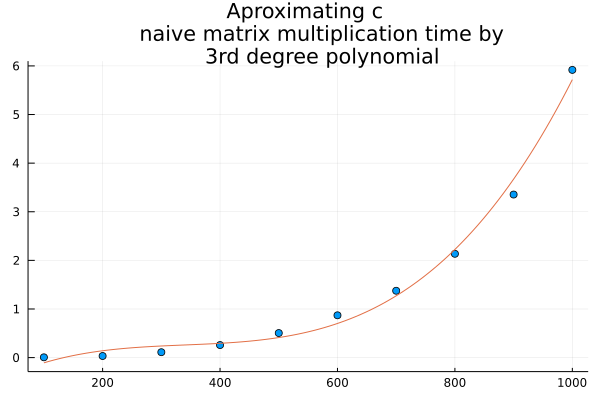

In [56]:
# using Plots
fit_poly_c_n = fit(x_c, y_c_n, 3)
scatter(x_c,y_c_n, label="")
plot!(fit_poly_c_n,  
    extrema(x_c)..., 
    label = "",
    title = "Aproximating c 
    naive matrix multiplication time by
    3rd degree polynomial"
)

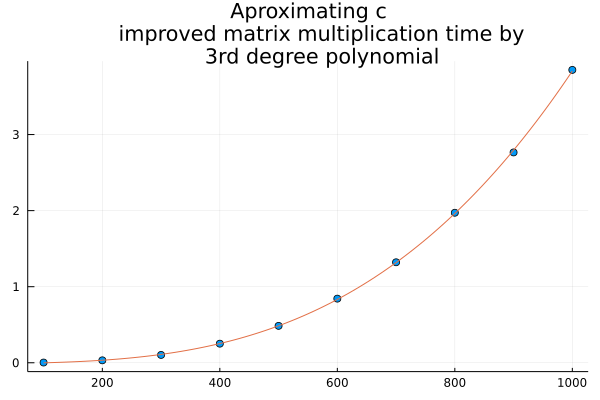

In [57]:
fit_poly_c_i = fit(x_c, y_c_i, 3)
scatter(x_c,y_c_i, label ="")
plot!(fit_poly_c_i,  
    extrema(x_c)..., 
    label = "",
    title = "Aproximating c
    improved matrix multiplication time by
    3rd degree polynomial"
)

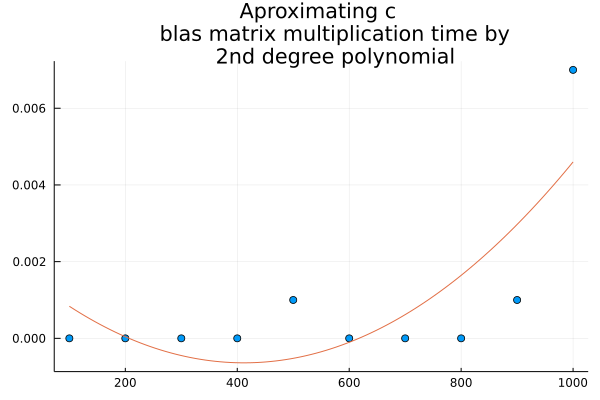

In [58]:
fit_poly_c_b = fit(x_c, y_c_b, 2)
scatter(x_c,y_c_b, label ="")
plot!(fit_poly_c_b,  
    extrema(x_c)..., 
    label = "",
    title = "Aproximating c 
    blas matrix multiplication time by
    2nd degree polynomial"
)

Cumulative plot

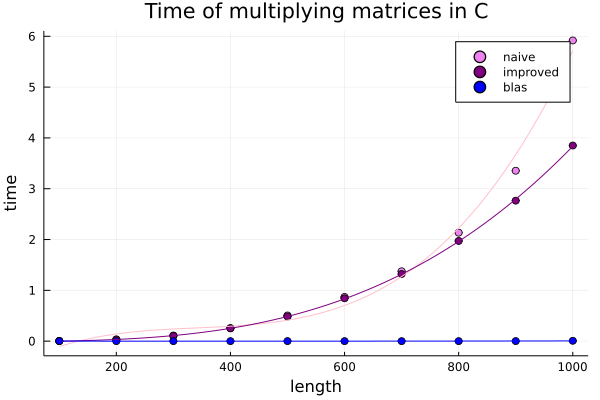

In [93]:
# using Plots
scatter([ df2_to_plot[df2_to_plot[:,2] .== "n", :].length df2_to_plot[df2_to_plot[:,2] .== "i", :].length df2_to_plot[df2_to_plot[:,2] .== "b", :].length],
    [ df2_to_plot[df2_to_plot[:,2] .== "n", :].time_mean  df2_to_plot[df2_to_plot[:,2] .== "i", :].time_mean df2_to_plot[df2_to_plot[:,2] .== "b", :].time_mean ],
    colour = [:violet :purple :blue],
    yerr = df2_to_plot.time_std,
    label = [ "naive" "improved" "blas"],
    title = "Time of multiplying matrices in C",
    xlab = "length",
    ylab = "time"
)
plot!(fit_poly_c_n,  
    extrema(x_c)..., 
    label = "",
    color = "pink"
)
plot!(fit_poly_c_i,  
    extrema(x_c)..., 
    label = "",
    color = "purple"
)
plot!(fit_poly_c_b,  
    extrema(x_c)..., 
    label = "",
    color = "blue"
)

### 4. Zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials

In [59]:
# using Polynomials
# using Plots

In [60]:
range_aprox = -5:1:5
f_approx(x) =  1/(1+x^2)

f_approx (generic function with 1 method)

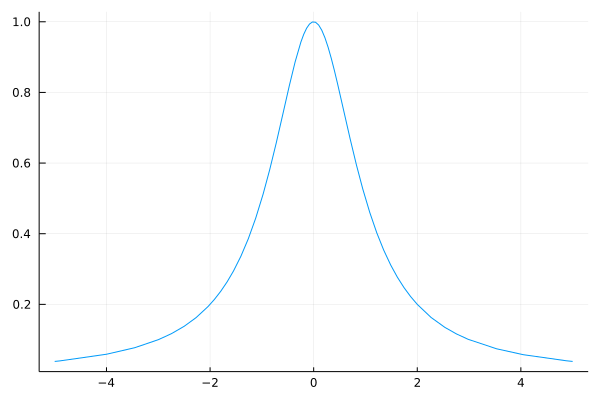

In [61]:
plot(f_approx,  extrema(range_aprox)..., label="")

In [62]:
y_aprox = map(x -> 1/(1+x^2), range_aprox)
println()

In [63]:
poly_aprox = fit(range_aprox,y_aprox,10)

Polynomial(0.9999999999999999 + 1.1102230246251565e-16*x - 0.6742081447963799*x^2 + 5.551115123125783e-17*x^3 + 0.19737556561085978*x^4 + 6.245004513516506e-17*x^5 - 0.024411764705882324*x^6 + 4.336808689942018e-18*x^7 + 0.0012669683257918553*x^8 - 2.710505431213761e-20*x^9 - 2.262443438914027e-5*x^10)

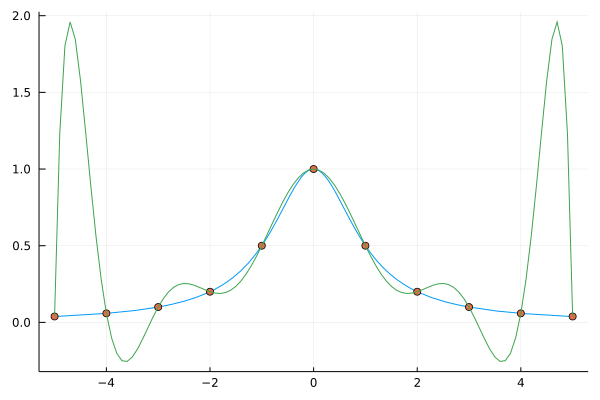

In [64]:
scatter!(range_aprox, y_aprox, label="")
plot!(poly_aprox,  extrema(range_aprox)..., label="")

In [65]:
che_base = [0,0,0,0,0,0,0,0,0,0,0,1]
println()

In [66]:
che_poly = ChebyshevT(che_base)

ChebyshevT(1⋅T_11(x))

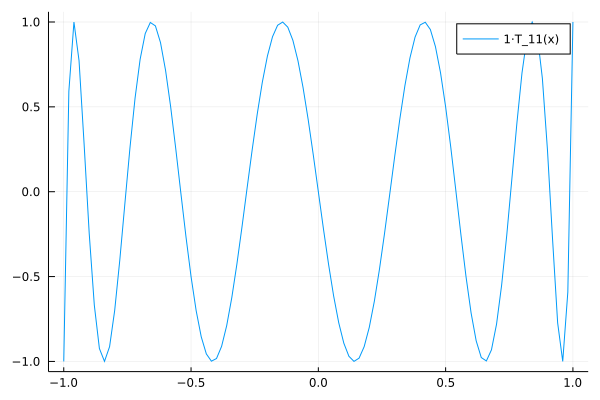

In [67]:
plot(che_poly)

In [68]:
che_poly_zeros = Polynomials.roots(che_poly)

11-element Vector{Float64}:
 -0.9898214418809095
 -0.9096319953545557
 -0.7557495743542416
 -0.5406408174555972
 -0.2817325568414296
  0.2817325568414299
  0.5406408174555981
  0.7557495743542435
  0.9096319953545553
  0.9898214418809105
  0.0

In [69]:
che_poly_zeros = 5 * che_poly_zeros

11-element Vector{Float64}:
 -4.949107209404548
 -4.548159976772778
 -3.778747871771208
 -2.703204087277986
 -1.4086627842071482
  1.4086627842071495
  2.7032040872779906
  3.7787478717712175
  4.5481599767727765
  4.949107209404552
  0.0

In [70]:
y_aprox_che = map(x -> 1/(1+x^2), che_poly_zeros)

11-element Vector{Float64}:
 0.03922543545625625
 0.04611321153027885
 0.06544958589639316
 0.12037587602054448
 0.3350834923284189
 0.3350834923284185
 0.12037587602054414
 0.06544958589639287
 0.046113211530278884
 0.03922543545625619
 1.0

In [71]:
poly_aprox_che = fit(che_poly_zeros,y_aprox_che,10)

Polynomial(0.9999999999999999 + 8.604228440844963e-16*x - 0.4990604609713287*x^2 - 5.273559366969494e-16*x^3 + 0.0983088297483915*x^4 + 6.591949208711867e-17*x^5 - 0.008540464354453409*x^6 - 5.421010862427522e-18*x^7 + 0.0003330709470076179*x^8 + 6.098637220230962e-20*x^9 - 4.775210709786642e-6*x^10)

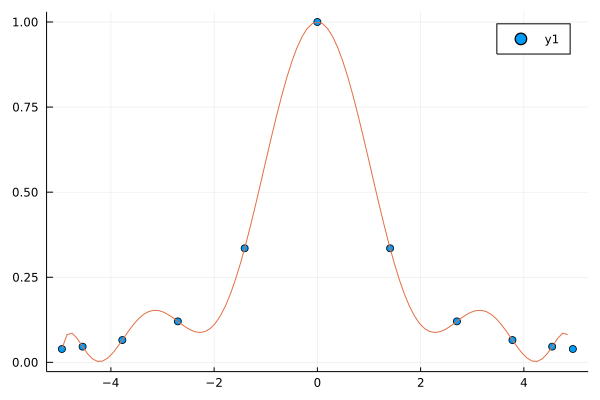

In [72]:
scatter(che_poly_zeros, y_aprox_che)
plot!(poly_aprox_che,  extrema(che_poly_zeros)..., label="")

#### Comparison

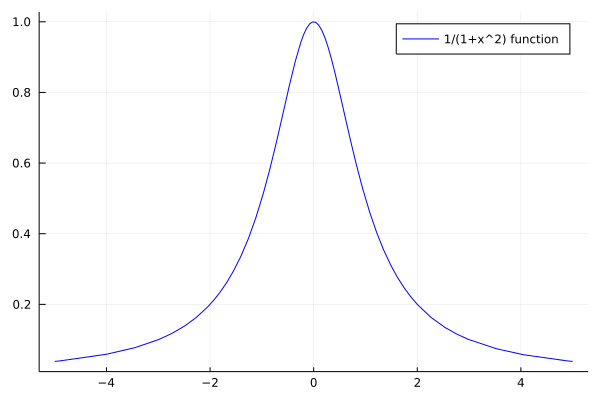

In [101]:
plot(f_approx,  extrema(range_aprox)..., 
    label="1/(1+x^2) function",
    color = "blue"
)

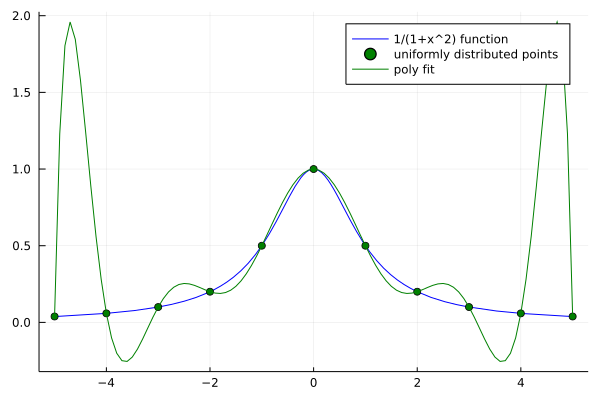

In [102]:
plot(f_approx,  extrema(range_aprox)..., 
    label="1/(1+x^2) function",
    color = "blue"
)
scatter!(range_aprox, y_aprox, 
    label="uniformly distributed points",
    color = "green"
)
plot!(poly_aprox,  extrema(range_aprox)..., 
    label="poly fit",
    color = "green"
)

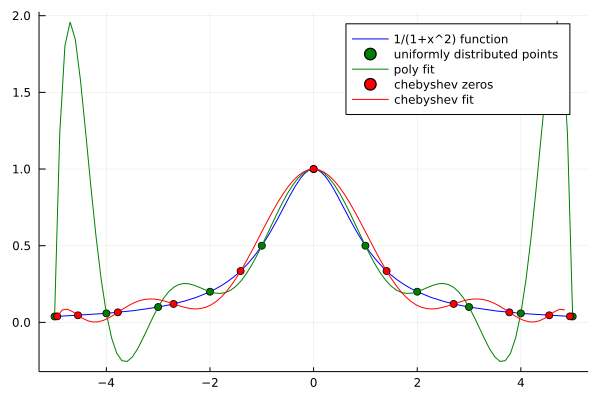

In [104]:
plot(f_approx,  extrema(range_aprox)..., 
    label="1/(1+x^2) function",
    color = "blue"
)
scatter!(range_aprox, y_aprox, 
    label="uniformly distributed points",
    color = "green"
)
plot!(poly_aprox,  extrema(range_aprox)..., 
    label="poly fit",
    color = "green"
)
scatter!(che_poly_zeros, y_aprox_che, 
    label="chebyshev zeros",
    color = "red"
)
plot!(poly_aprox_che,  extrema(che_poly_zeros)..., 
    label="chebyshev fit",
    color = "red"
)

Dzięki optymalizacji wyboru punktów metodą Chebysheva (więcej punktów na skraju przedziału, mniej w środku), zanika efekt Rungego. Na skrajach przedziału wielomian aproksymacyjny nie "ucieka" już tak bardzo od oryginalnego

### 5

5. Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ (1 pkt)

In [76]:
# using TaylorSeries
# using Polynomials

In [77]:
taylor_base = Taylor1(Float64, 10)

 1.0 t + 𝒪(t¹¹)

In [78]:
function_test(x) = log(1+x)/x

function_test (generic function with 1 method)

In [79]:
taylor_poly_base = function_test(t)

 1.0 - 0.5 t + 0.3333333333333333 t² - 0.25 t³ + 0.2 t⁴ + 𝒪(t⁶)

In [80]:
taylor_poly = Polynomial(taylor_poly_base.coeffs)

Polynomial(1.0 - 0.5*x + 0.3333333333333333*x^2 - 0.25*x^3 + 0.2*x^4)

In [81]:
pade_obj = Polynomials.PolyCompat.PadeApproximation.Pade(taylor_poly, 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64, Float64}(Polynomial(1.0 + 0.6999999999999987*x + 0.03333333333333298*x^2), Polynomial(1.0 + 1.1999999999999986*x + 0.29999999999999905*x^2), :x)

In [82]:
fieldnames(typeof(pade_obj))

(:p, :q, :var)

In [83]:
pade_val(x) = pade_obj.p(x) / pade_obj.q(x)
taylor_val(x) = taylor_poly(x)

taylor_val (generic function with 1 method)

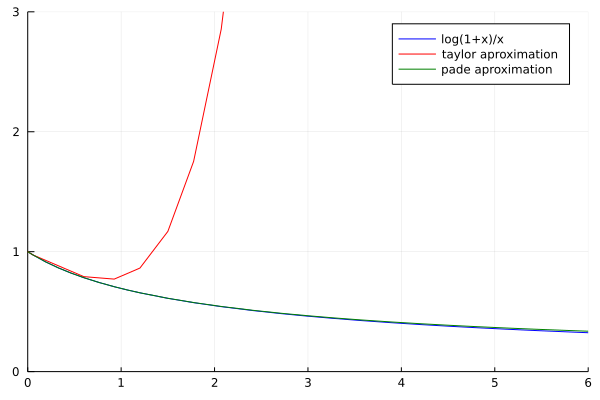

In [84]:
plot(function_test,
    xlims = (0,6),
    ylims = (0,3),
    label="log(1+x)/x",
    color = "blue"
)
plot!(taylor_val,
    label="taylor aproximation",
    color = "red"
)
plot!(pade_val,
    label="pade aproximation",
    color = "green"
)